# Preprocess
## numeric
### scaling
#### 线性函数归一化 Min-Max Scaling

In [2]:
from sklearn import preprocessing
import numpy as np
x = np.array([[ 0., -3.,  1.], [ 3.,  1.,  2.], [ 0.,  1., -1.]]) # 初始化数据，每一行表示一个样本，每一列表示一个特征
min_max_scaler = preprocessing.MinMaxScaler() # 将数据进行 min-max 规范化
minmax_x = min_max_scaler.fit_transform(x)
print(minmax_x)

[[0.         0.         0.66666667]
 [1.         1.         1.        ]
 [0.         1.         0.        ]]


#### Titanic Dataset 演示

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
import matplotlib.pyplot as plt

DATA_FOLDER = '../../dataset/titanic/'

train = pd.read_csv(os.path.join(DATA_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

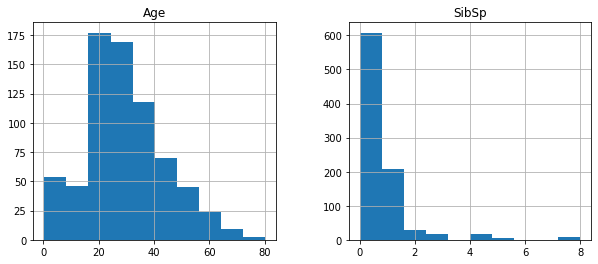

In [4]:
train[['Age','SibSp']].hist(figsize=(10,4))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

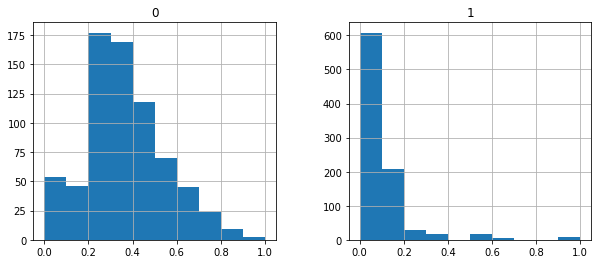

In [5]:
scaler = preprocessing.MinMaxScaler()
xtrain = scaler.fit_transform(train[['Age','SibSp']])
pd.DataFrame(xtrain).hist(figsize=(10,4))

#### 零均值归一化 Z-score

In [6]:
from sklearn import preprocessing
import numpy as np
x = np.array([[ 0., -3.,  1.], [ 3.,  1.,  2.], [ 0.,  1., -1.]]) # 初始化数据
standard_scaled_scaler = preprocessing.StandardScaler() # 将数据进行 StandardScaler 规范化
standard_scaled_x = standard_scaled_scaler.fit_transform(x)
print(standard_scaled_x) # 以下可见每个特征（列）均值为 0 

[[-0.70710678 -1.41421356  0.26726124]
 [ 1.41421356  0.70710678  1.06904497]
 [-0.70710678  0.70710678 -1.33630621]]


### Outliers
#### Winsorization

In [7]:
pd.Series(x).hist(bins=30)

ValueError: Data must be 1-dimensional

UPPERBOUND, LOWERBOUND = np.percentile(x, [1, 99])
y = np.clip(x, UPPERBOUND, LOWERBOUND)
pd.Series(y).hist(bins=30)

#### Rank

In [8]:
obj = pd.Series([7,-5,7,4,2,0,4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

### log

In [40]:
np.log(1+x)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

### 指数

In [ ]:
np.sqrt(x+0.5)

## Categorical
### Label Encoder
#### Alphabetical
sklearn.preprocessing.LabelEncoder() 

In [9]:
sex = pd.Series(["male", "female", "female", "male"])
le = preprocessing.LabelEncoder()  # 获取一个LabelEncoder
le = le.fit(["male", "female"])  # 训练LabelEncoder, 把male编码为0，female编码为1
sex = le.transform(sex)  # 使用训练好的LabelEncoder对原数据进行编码
print(sex)

[1 0 0 1]


#### Order of appearance

In [10]:
licenses = pd.Series(["a", "b", "c", "d", "b", "c", "d"])
factorized_licenses = pd.factorize(licenses) 
print(factorized_licenses)

(array([0, 1, 2, 3, 1, 2, 3]), Index(['a', 'b', 'c', 'd'], dtype='object'))


#### One-hot

In [11]:
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
label_encoder = preprocessing.LabelEncoder()  # integer encode
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)  # sparse 只存非零值
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## 文字
### Bag of Words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(ngram_range=(1, 1), binary=False, token_pattern='\w{1,}') 
vec = cv.fit_transform(['I love you', 'you are my angle are'] ) 
print(cv.get_feature_names()) # 特征名称 
print(vec) 
df = pd.DataFrame(vec.toarray(), columns=cv.get_feature_names()) # to DataFrame 
print(df.head())

['angle', 'are', 'i', 'love', 'my', 'you']
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (1, 5)	1
  (1, 1)	2
  (1, 4)	1
  (1, 0)	1
   angle  are  i  love  my  you
0      0    0  1     1   0    1
1      1    2  0     0   1    1


TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(binary=False, decode_error='ignore', stop_words='english')
vec = tv.fit_transform(['hello world','this is a panda.'])#传入句子组成的list
print(tv.get_feature_names()) # 特征名称 
print(vec) 
df = pd.DataFrame(vec.toarray(), columns=tv.get_feature_names()) # to DataFrame 
print(df.head())

['hello', 'panda', 'world']
  (0, 2)	0.7071067811865476
  (0, 0)	0.7071067811865476
  (1, 1)	1.0
      hello  panda     world
0  0.707107    0.0  0.707107
1  0.000000    1.0  0.000000
